In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data
N_ia = 1e8  # Número de SN Ia
M_total = 2e11  # Total stellar mass MW (M_sun)
M_h = 0.75 * M_total  # H mass (M_sun)

# SN Ia yields
yield_ia = {
    'O': 0.00,
    'Mg': 0.09,
    'Si': 0.16,
    'S': 0.08,
    'Ar': 0.02,
    'Ca': 0.04,
    'Fe': 0.14 + 0.61,  # 54Fe + 56Fe
    'Ni': 0.06
}

# SN II yields (average)
yield_ii = {
    'O': (0.15 + 9.11) / 2,
    'Mg': (0.009 + 0.35) / 2,
    'Si': (0.07 + 0.43) / 2,
    'S': (0.015 + 0.18) / 2,
    'Ar': (0.002 + 0.03) / 2,
    'Ca': (0.002 + 0.025) / 2,
    'Fe': (0.002 + 0.009) / 2 + (0.15 + 0.075) / 2,  # 54Fe + 56Fe
    'Ni': (0.006 + 0.003) / 2
}

# Solar values Asplund et al. (2009)
X_sun = {
    'O': 0.0057,
    'Mg': 0.0007,
    'Si': 0.00065,
    'S': 0.00032,
    'Ar': 0.00008,
    'Ca': 0.00006,
    'Fe': 0.0012,
    'Ni': 0.00007
}

# Atomic numbers (Z)
atomic_numbers = {
    'O': 8,
    'Mg': 12,
    'Si': 14,
    'S': 16,
    'Ar': 18,
    'Ca': 20,
    'Fe': 26,
    'Ni': 28
}


Best r: 3.81
r for Fe: 8.90
r for O: 1.85


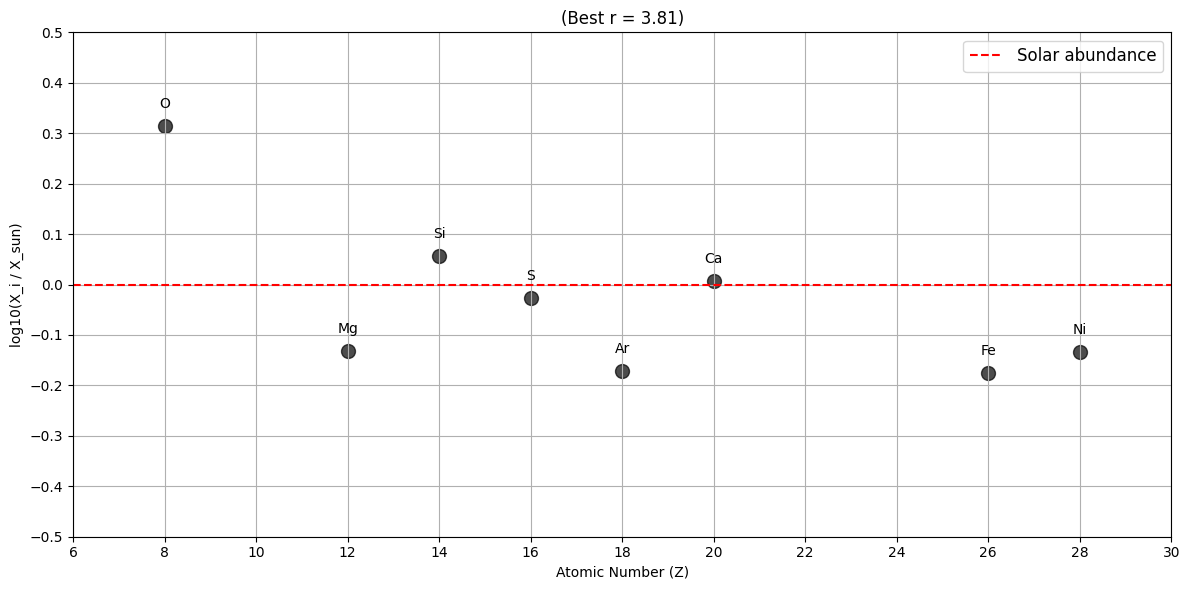

In [3]:
# Imports libraries
import numpy as np
import matplotlib.pyplot as plt

# Calculates mass fraction
def calculate_mass_fractions(r, yield_ia, yield_ii, normalization_factor):
    X_i = {}
    for element in yield_ia:
        X_i[element] = normalization_factor * (yield_ia[element] + r * yield_ii[element])
    return X_i

# Calculates log ratio
def calculate_log_ratios(r, yield_ia, yield_ii, X_sun, normalization_factor):

    X_i = calculate_mass_fractions(r, yield_ia, yield_ii, normalization_factor)
    return {element: np.log10(X_i[element]/X_sun[element]) for element in X_i}

# Finds best value for r
def find_optimal_r(r_values, yield_ia, yield_ii, X_sun, normalization_factor):

    # Defines infinite value for initial error
    best_r, min_error = None, float('inf')

    # Uses minimal quadratic error to define error
    for r in r_values:
        log_ratios = calculate_log_ratios(r, yield_ia, yield_ii, X_sun, normalization_factor)
        error = sum(val**2 for val in log_ratios.values())
        # If new error is smaller than current, becomes the current one
        if error < min_error:
            min_error, best_r = error, r

    return best_r

# Finds r for element
def find_r_for_element(element, yield_ia, yield_ii, X_sun, normalization_factor):


    numerator = (X_sun[element] / normalization_factor) - yield_ia[element]
    return numerator / yield_ii[element]

# Normalization factor
normalization = (2/3) * 1e-3

# Candidates for r
r_values = np.linspace(0.1, 20, 500)

# Find optimal values
best_r = find_optimal_r(r_values, yield_ia, yield_ii, X_sun, normalization)
r_Fe = find_r_for_element('Fe', yield_ia, yield_ii, X_sun, normalization)
r_O = find_r_for_element('O', yield_ia, yield_ii, X_sun, normalization)

# Plots R values
print(f"Best r: {best_r:.2f}")
print(f"r for Fe: {r_Fe:.2f}")
print(f"r for O: {r_O:.2f}")

# Find ratios
log_ratios = calculate_log_ratios(best_r, yield_ia, yield_ii, X_sun, normalization)
elements = list(log_ratios.keys())

# Plot
plt.figure(figsize=(12, 6))
z = [atomic_numbers[el] for el in elements]
ratios = [log_ratios[el] for el in elements]
plt.scatter(z, ratios, color='black', s=100, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label='Solar abundance')

# Adds element names above points
for i, el in enumerate(elements):
    plt.text(z[i], ratios[i]+0.03, el,
            ha='center', va='bottom', fontsize=10)

plt.xlabel('Atomic Number (Z)')
plt.ylabel('log10(X_i / X_sun)')
plt.title(f'(Best r = {best_r:.2f})')
plt.xlim(6, 30)
plt.xticks(np.arange(6, 31, 2))
plt.grid()
plt.legend(fontsize=12)
plt.yticks(np.arange(-0.5, 0.6, 0.1))
plt.tight_layout()
plt.show()